In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
%matplotlib inline
import seaborn as sns
df=pd.read_csv(r'C:\Users\DELL\Downloads\2015-building-energy-benchmarking.csv')
#predict the emissions of buildings whose emissions have not yet been measured.

In [2]:
df.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,...,GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,...,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,...,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,...,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,...,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,...,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576


In [3]:
#sort the column
df=df.reindex(sorted(df.columns), axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 47 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   2010 Census Tracts                                             224 non-null    float64
 1   BuildingType                                                   3340 non-null   object 
 2   City Council Districts                                         213 non-null    float64
 3   Comment                                                        13 non-null     object 
 4   ComplianceStatus                                               3340 non-null   object 
 5   CouncilDistrictCode                                            3340 non-null   int64  
 6   DataYear                                                       3340 non-null   int64  
 7   DefaultData                                                 

In [5]:
df=df.fillna(df.mean())
df =df.fillna(df.mode())


In [6]:
print(df.isnull().values.sum())

14623


In [7]:
df=df.fillna(df.mean())

In [8]:
print(df.isnull().values.sum())

14623


In [9]:
df =df.fillna(df.mode())

In [10]:
print(df.isnull().values.sum())

14623


In [11]:
df_nonr=df[(df['BuildingType'] =='NonResidential') ]

In [13]:
df_nonr.drop(['Comment','Outlier','SecondLargestPropertyUseType','ThirdLargestPropertyUseType','YearsENERGYSTARCertified',
         'LargestPropertyUseType','Zip Codes','ListOfAllPropertyUseTypes','LargestPropertyUseType',
         'TaxParcelIdentificationNumber','DefaultData',"DataYear","2010 Census Tracts","City Council Districts","Electricity(kWh)","NaturalGas(therms)","PropertyGFABuilding(s)",
          "SiteEUI(kBtu/sf)","SiteEnergyUse(kBtu)","SourceEUI(kBtu/sf)","LargestPropertyUseTypeGFA","SecondLargestPropertyUseTypeGFA",
           "Seattle Police Department Micro Community Policing Plan Areas","NumberofFloors","SiteEUIWN(kBtu/sf)","PropertyGFAParking",
          "DefaultData","YearBuilt","SPD Beats","ThirdLargestPropertyUseTypeGFA","NumberofBuildings","OSEBuildingID","CouncilDistrictCode"] ,axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [14]:
df_nonr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1461 entries, 0 to 3334
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   BuildingType                       1461 non-null   object 
 1   ComplianceStatus                   1461 non-null   object 
 2   ENERGYSTARScore                    1461 non-null   float64
 3   Electricity(kBtu)                  1461 non-null   float64
 4   GHGEmissions(MetricTonsCO2e)       1461 non-null   float64
 5   GHGEmissionsIntensity(kgCO2e/ft2)  1461 non-null   float64
 6   Location                           1461 non-null   object 
 7   NaturalGas(kBtu)                   1461 non-null   float64
 8   Neighborhood                       1461 non-null   object 
 9   OtherFuelUse(kBtu)                 1461 non-null   float64
 10  PrimaryPropertyType                1461 non-null   object 
 11  PropertyGFATotal                   1461 non-null   int64

In [16]:
df_nonr_num=df_nonr.select_dtypes(np.number)
df_nonr_obj=df_nonr.select_dtypes('object')

In [17]:
df_nonr_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1461 entries, 0 to 3334
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ENERGYSTARScore                    1461 non-null   float64
 1   Electricity(kBtu)                  1461 non-null   float64
 2   GHGEmissions(MetricTonsCO2e)       1461 non-null   float64
 3   GHGEmissionsIntensity(kgCO2e/ft2)  1461 non-null   float64
 4   NaturalGas(kBtu)                   1461 non-null   float64
 5   OtherFuelUse(kBtu)                 1461 non-null   float64
 6   PropertyGFATotal                   1461 non-null   int64  
 7   SiteEnergyUseWN(kBtu)              1461 non-null   float64
 8   SourceEUIWN(kBtu/sf)               1461 non-null   float64
 9   SteamUse(kBtu)                     1461 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 125.6 KB


In [21]:
df_nonr_num.drop(["ENERGYSTARScore","OtherFuelUse(kBtu)","PropertyGFATotal","SiteEnergyUseWN(kBtu)","SourceEUIWN(kBtu/sf)","SteamUse(kBtu)","GHGEmissionsIntensity(kgCO2e/ft2)"], axis=1,inplace=True)

KeyError: "['ENERGYSTARScore' 'OtherFuelUse(kBtu)' 'PropertyGFATotal'\n 'SiteEnergyUseWN(kBtu)' 'SourceEUIWN(kBtu/sf)' 'SteamUse(kBtu)'] not found in axis"

In [22]:
df_nonr_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1461 entries, 0 to 3334
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Electricity(kBtu)                  1461 non-null   float64
 1   GHGEmissions(MetricTonsCO2e)       1461 non-null   float64
 2   GHGEmissionsIntensity(kgCO2e/ft2)  1461 non-null   float64
 3   NaturalGas(kBtu)                   1461 non-null   float64
dtypes: float64(4)
memory usage: 57.1 KB


In [24]:
df_nonr_num.drop(["GHGEmissionsIntensity(kgCO2e/ft2)"], axis=1, inplace=True)

In [25]:
df_nonr_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1461 entries, 0 to 3334
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Electricity(kBtu)             1461 non-null   float64
 1   GHGEmissions(MetricTonsCO2e)  1461 non-null   float64
 2   NaturalGas(kBtu)              1461 non-null   float64
dtypes: float64(3)
memory usage: 85.7 KB


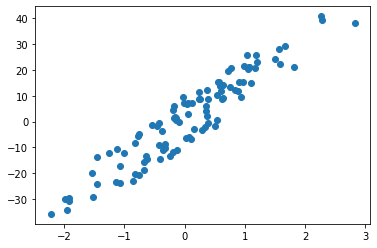

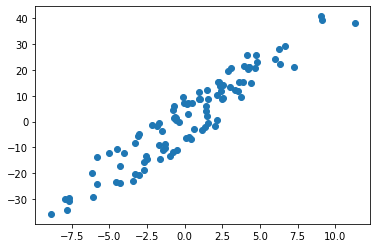

0.8775730349038784


In [26]:
# General imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generating data
X = np.random.randn(100,1)
c = np.random.uniform(-10,10,(100,))
# adding another linear column
X = np.hstack((X, 4*X))

Y = (4*X[:,1] + c)

plt.scatter(X[:, 0], Y)
plt.show()
plt.scatter(X[:, 1], Y)
plt.show()
# Applying linear reg
from sklearn.linear_model import LinearRegression
regressor = LinearRegression().fit(X, Y)
# Checking the accuracy
from sklearn.metrics import r2_score
print(r2_score(regressor.predict(X), Y))